Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN     

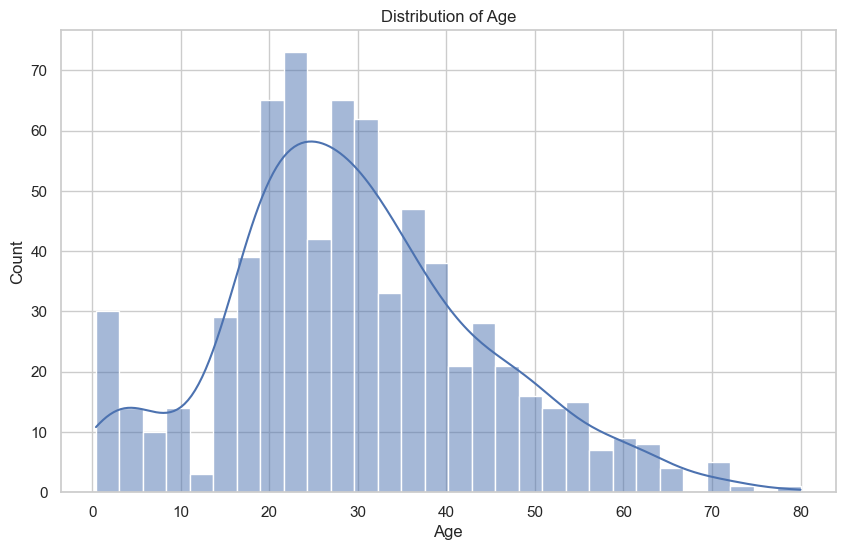

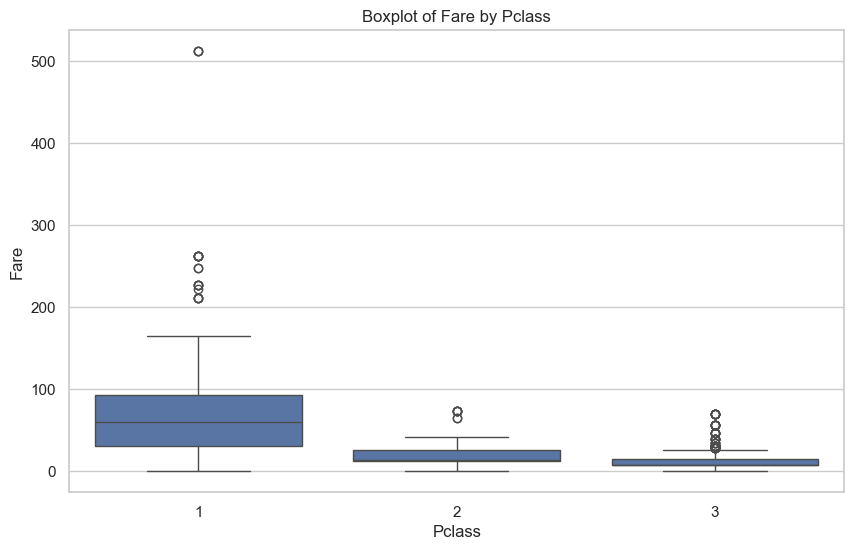

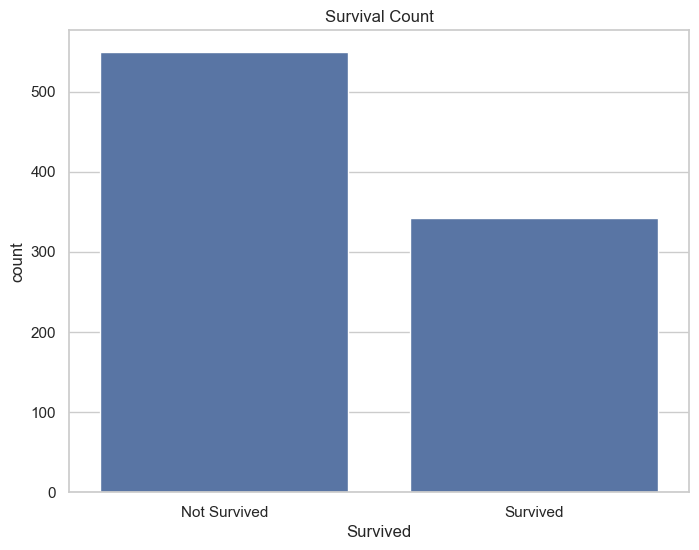

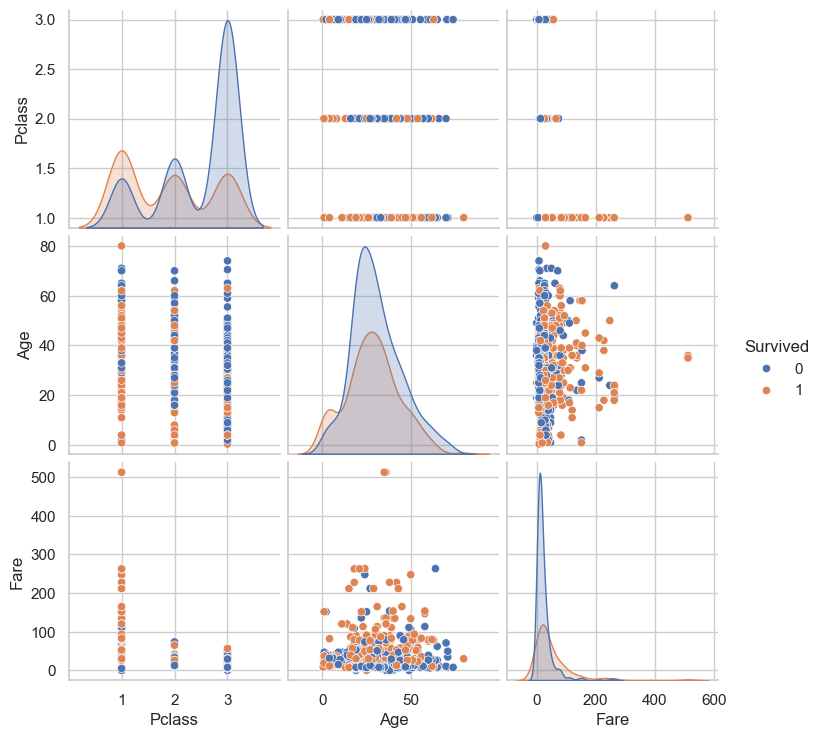

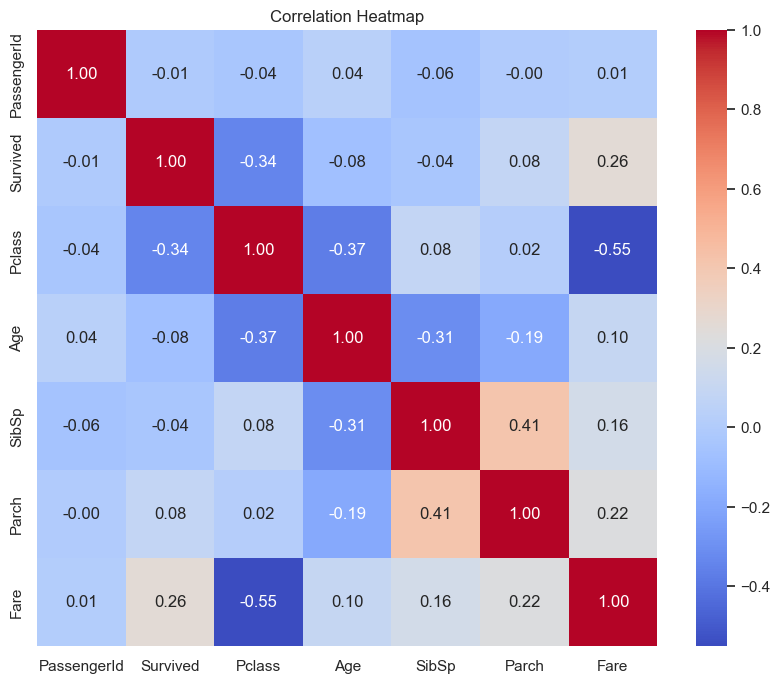

In [6]:
# EDA for Titanic Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")  # Change path if needed

# Basic Info
print("Dataset Info:")
print(df.info())

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Distribution of Age")
plt.savefig("eda_age_hist.png")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Boxplot of Fare by Pclass")
plt.savefig("eda_fare_boxplot.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.savefig("eda_survival_count.png")
plt.show()

subset = df[['Survived', 'Pclass', 'Age', 'Fare']].dropna()
sns.pairplot(subset, hue='Survived', diag_kind='kde')
plt.savefig("eda_pairplot.png")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("eda_corr_heatmap.png")
plt.show()


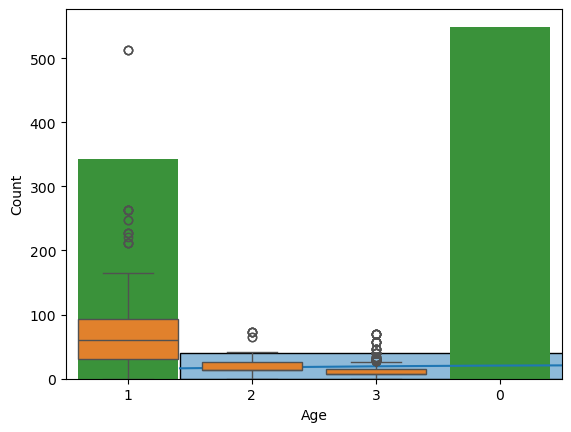

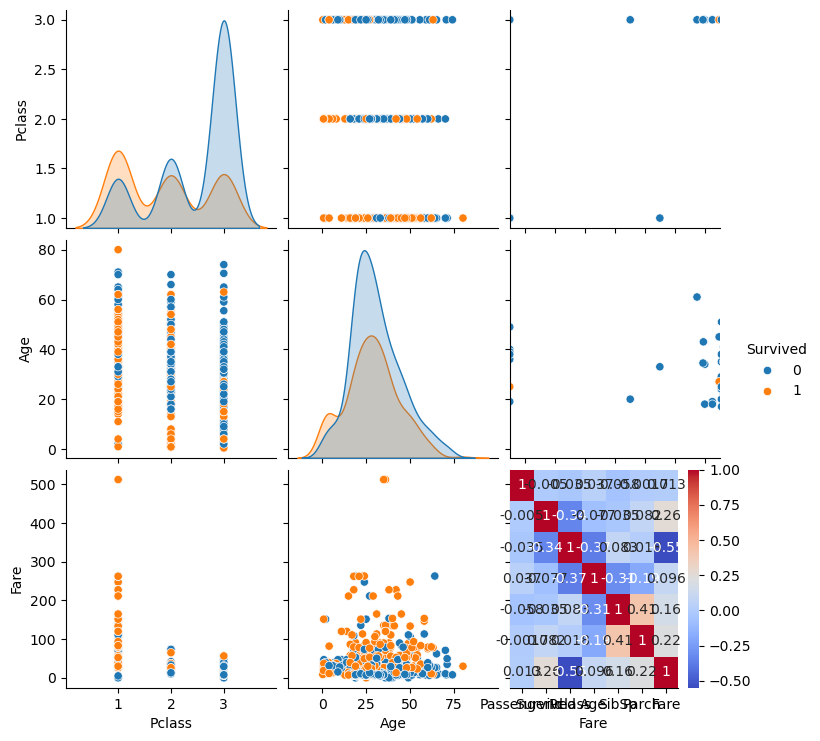

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches
import io

# Load data
df = pd.read_csv("train.csv")  # Update path as needed

# Create visualizations
sns.histplot(df['Age'].dropna(), kde=True).figure.savefig("eda_age_hist.png")
sns.boxplot(x='Pclass', y='Fare', data=df).figure.savefig("eda_fare_boxplot.png")
sns.countplot(x='Survived', data=df).figure.savefig("eda_survival_count.png")
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(), hue='Survived').savefig("eda_pairplot.png")
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm").figure.savefig("eda_corr_heatmap.png")

# Create Word report
doc = Document()
doc.add_heading("Titanic EDA Report", 0)

doc.add_heading("1. Dataset Info", level=1)
buffer = io.StringIO()
df.info(buf=buffer)
doc.add_paragraph(buffer.getvalue())

doc.add_heading("2. Summary Statistics", level=1)
doc.add_paragraph(df.describe(include='all').to_string())

doc.add_heading("3. Missing Values", level=1)
doc.add_paragraph(df.isnull().sum().to_string())

doc.add_heading("4. Visualizations", level=1)
doc.add_picture("eda_age_hist.png", width=Inches(5.5))
doc.add_picture("eda_fare_boxplot.png", width=Inches(5.5))
doc.add_picture("eda_survival_count.png", width=Inches(5.5))
doc.add_picture("eda_pairplot.png", width=Inches(5.5))
doc.add_picture("eda_corr_heatmap.png", width=Inches(5.5))



doc.add_heading("5. Summary", level=1)
doc.add_paragraph(
    "- Younger passengers and 1st class had higher survival.\n"
    "- Females more likely to survive.\n"
    "- Missing values in Age, Cabin, Embarked.\n"
    "- Fare correlated with class and survival."
)

doc.save("Titanic_EDA_Report.docx")

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches
import io
import os

# Load the Titanic dataset
df = pd.read_csv("train.csv")  # Update path if needed

# Create output directory for images
os.makedirs("eda_images", exist_ok=True)

# 1. Histogram of Age
plt.figure()
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.savefig("eda_images/eda_age_hist.png")
plt.close()

# 2. Boxplot of Fare vs Pclass
plt.figure()
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.savefig("eda_images/eda_fare_boxplot.png")
plt.close()

# 3. Countplot of Survival
plt.figure()
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.savefig("eda_images/eda_survival_count.png")
plt.close()

# 4. Pairplot
pairplot_fig = sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(), hue='Survived', palette='coolwarm')
pairplot_fig.fig.suptitle("Pairplot of Survived, Pclass, Age, Fare", y=1.02)
pairplot_fig.savefig("eda_images/eda_pairplot.png")
plt.close()

# 5. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_images/eda_corr_heatmap.png")
plt.close()

# Create Word report
doc = Document()
doc.add_heading("Titanic EDA Report", 0)

# 1. Dataset Info
doc.add_heading("1. Dataset Info", level=1)
buffer = io.StringIO()
df.info(buf=buffer)
doc.add_paragraph(buffer.getvalue())

# 2. Summary Statistics
doc.add_heading("2. Summary Statistics", level=1)
doc.add_paragraph(df.describe(include='all').to_string())

# 3. Missing Values
doc.add_heading("3. Missing Values", level=1)
doc.add_paragraph(df.isnull().sum().to_string())

# 4. Visualizations
doc.add_heading("4. Visualizations", level=1)
doc.add_picture("eda_images/eda_age_hist.png", width=Inches(5.5))
doc.add_picture("eda_images/eda_fare_boxplot.png", width=Inches(5.5))
doc.add_picture("eda_images/eda_survival_count.png", width=Inches(5.5))
doc.add_picture("eda_images/eda_pairplot.png", width=Inches(5.5))
doc.add_picture("eda_images/eda_corr_heatmap.png", width=Inches(5.5))

# 5. Summary Insights
doc.add_heading("5. Summary", level=1)
doc.add_paragraph(
    "- Younger passengers and 1st class had higher survival chances.\n"
    "- Females were more likely to survive.\n"
    "- Missing values are mostly in Age, Cabin, and Embarked columns.\n"
    "- Fare is positively correlated with class and survival."
)

# Save Word file
doc.save("Titanic_EDA_Report.docx")
print("✅ Titanic_EDA_Report.docx generated successfully.")


✅ Titanic_EDA_Report.docx generated successfully.
